In [97]:
import math
from decimal import Decimal as D
from decimal import getcontext
import matplotlib.pyplot as plt

In [98]:

def configuracionEpPr(tolerancia):
    """Recibe una lista de tolerancias para definir la precision que se va a usar en el programa

    Args:
        tolerancia (List): Lista de tolerancias a utilizar
    """
    max = 0
    for tol in tolerancia:
        if int(abs(math.log10(tol))) > max:
            max = int(abs(math.log10(tol)))

    getcontext().prec = max + 1 + 50  # tolerancia + 50 decimales de precision extra


def printNumTOL(numero, tolerancia, cantidadExtraDecimales=2):
    """Imprime correctamente el número, dada la tolerancia más cierta cantidad de decimales extra

    Args:
        numero (number): El número a mostrar
        tolerancia (number): La tolerancia del número ingresado
        cantidadExtraDecimales (int, optional): cantidad de decimales extra. Defaults to 2.
    """
    decimalesAObservar = int(abs(math.log10(tolerancia))) + 1 + cantidadExtraDecimales  # Mostrar 2 decimales más de la tolerancia
    cantiDecimales = "{:." + str(decimalesAObservar) + "f}"
    print(cantiDecimales.format(numero))


def numTOL(numero, tolerancia, cantidadExtraDecimales=2):
    """Retorna correctamente el número, dada la tolerancia más cierta cantidad de decimales extra

    Args:
        numero (number): El número a mostrar
        tolerancia (number): La tolerancia del número ingresado
        cantidadExtraDecimales (int, optional): cantidad de decimales extra. Defaults to 2.
    """
    decimalesAObservar = int(abs(math.log10(tolerancia))) + 1 + cantidadExtraDecimales  # Mostrar 2 decimales más de la tolerancia
    cantiDecimales = "{:." + str(decimalesAObservar) + "f}"
    return cantiDecimales.format(numero)


In [99]:

def a_fx(x):
    return (D(math.cos(D(x))) ** D(2)) - (D(x) ** D(2))

def b_fx(x):
    #if -1 <= x <= 2:  # en [-1,2]
    return (D(x) * D(math.sin(D(x)))) - D(1)

def c_fx(x):
    return (D(x)**D(3)) - ((D(2)*D(x))**D(2)) + ((D(4)/D(3))*D(x)) - (D(8)/D(27))


def d_fx(x):
    #return ((68.1*9.81)/x) * (1-math.e**(-x/(68.1*10))) - 40
    return (((D(68.1)*D(9.81))/D(x))*(D(1)-D(math.e)**(-((D(x) * D(10))/(D(68.1))))))-D(40)


def e_fx(x):
    return (D(1) * pow(D(x), D(3)) - (D(2)*D(x)) - D(5))  # = 0


def f_fx(x):
    return (D(math.e) ** - D(x)) - D(x)

In [100]:
def regulaFalsiSinIteracion(x0, x1, fx):
    fx0 = fx(x0)
    fx1 = fx(x1)

    x2 = D(x1) - ((fx1)/(fx1 - fx0) * (D(x1) - D(x0)))
    return x2

def BiseccionSinIteracion(x0, x1, fx):
    x2 = (x0 + x1) / 2
    return x2

In [101]:
def muller(x0, x1, fx, E):
    # Verificar el intervalo con Teorema de Bolzano
    if fx(x0) * fx(x1) > 0:
        print("El intervalo dado no es válido")
        return "ninguno", 0
    else:
        # Pasos para obtener el x2
        x2 = regulaFalsiSinIteracion(x0, x1, fx)

        verificacion = D(1)
        iteracion = 0
        polinomioHistory = []
        resultadosError = []

        # Verificar si es correcto
        while(abs(verificacion) > D(E)):

            resultadosError.append(abs(D(x1) - D(x0)))

            # Pasos previos para hallar el xFinal
            h0 = D(x1)-D(x0)
            h1 = x2 - D(x1)

            d0 = (fx(x1) - fx(x0)) / h0
            d1 = (fx(x2) - fx(x1)) / h1

            # Pasos para obtener el valor de las constantes
            a = (d1 - d0)/(h1 - h0)
            b = a*h1 + d1
            c = fx(x2)

            # Pasos para hallar el xFinal
            signo = D(-1) if b < D(0) else D(1)
            verificacion = ((D(-2) * c)/(b + (signo * D(math.sqrt((b ** D(2)) - (D(4) * a * c))))))
            xFinal = x2 + verificacion

            polinomioHistory.append(xFinal)
            # Reasignar valores
            iteracion += 1

            x0 = x1
            x1 = x2
            x2 = xFinal
            
        return numTOL(xFinal, E), iteracion, resultadosError


El resultado de la raíz es: 14.8011359450 con 3 iteraciones y con una tolerancia de 1e-07
El resultado de la raíz es: 14.801135944991261727 con 5 iteraciones y con una tolerancia de 1e-15
El resultado de la raíz es: 14.8011359449912617266379442307539696 con 6 iteraciones y con una tolerancia de 1e-31
El resultado de la raíz es: 14.8011359449912617266379442307539696196459482109002241987741 con 8 iteraciones y con una tolerancia de 1e-55


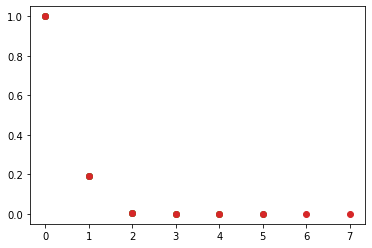

In [119]:
TOL = [10e-8, 10e-16, 10e-32, 10e-56]

configuracionEpPr(TOL)

for tolerancia in TOL:
    resultado, iteracion, error = muller(14, 15, d_fx, tolerancia)
    print("El resultado de la raíz es: " + str(resultado) + " con " + str(iteracion) + " iteraciones" + " y con una tolerancia de " + str(tolerancia))
    #for i, e in enumerate(error):
    #    print("Iteración: " + str(i) + " Error: " + numTOL(e, tolerancia))
    
    # Convergencia
    plt.plot(range(len(error)), error, 'o')
